# PMF, PDF and CDF

## Probability Mass Function, Probability Density Function and Cumulative Density Function

### Teacher Notes

> While PMF, PDF and CDF are often taught sequentially in that order, building upon each other, I often find it more intuitive to explain them in the reverse order, starting with CDF, or Cumulative Density Functions. A Cumulative Density Function is really just a graph of percentiles. Let's take a look at a dataset to explore.

## CDF - Cumulative Density Function

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
!head babies.txt

bwt gestation parity age height weight smoke
120 284   0  27  62 100   0
113 282   0  33  64 135   0
128 279   0  28  64 115   1
123 999   0  36  69 190   0
108 282   0  23  67 125   1
136 286   0  25  62  93   0
138 244   0  33  62 178   0
132 245   0  23  65 140   0
120 289   0  25  62 125   0


In [3]:
df = pd.read_csv('baby_weights.csv')
df.head()

,weight
0,120
1,113
2,128
3,123
4,108


In [4]:
for i in range(10):
    print('{}th percentile: {}'.format(i*10, df.weight.quantile(q=i/10.0)))

0th percentile: 55.0
10th percentile: 97.0
20th percentile: 105.0
30th percentile: 111.0
40th percentile: 116.0
50th percentile: 120.0
60th percentile: 124.0
70th percentile: 129.0
80th percentile: 134.0
90th percentile: 142.0


### Teacher Notes

> It's worth investigating studen'ts knowledge of percentiles briefly. Ask someone to explain what the 90th percentile is. Make sure students uncover that the 90th percentile (142) means that a weight of 142 is the same weight or more then 90% of the data points, with the remaining 10% even larger.

0th percentile: 55.0
10th percentile: 97.0
20th percentile: 105.0
30th percentile: 111.0
40th percentile: 116.0
50th percentile: 120.0
60th percentile: 124.0
70th percentile: 129.0
80th percentile: 134.0
90th percentile: 142.0


/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0,0.5,'Cumulative Density')

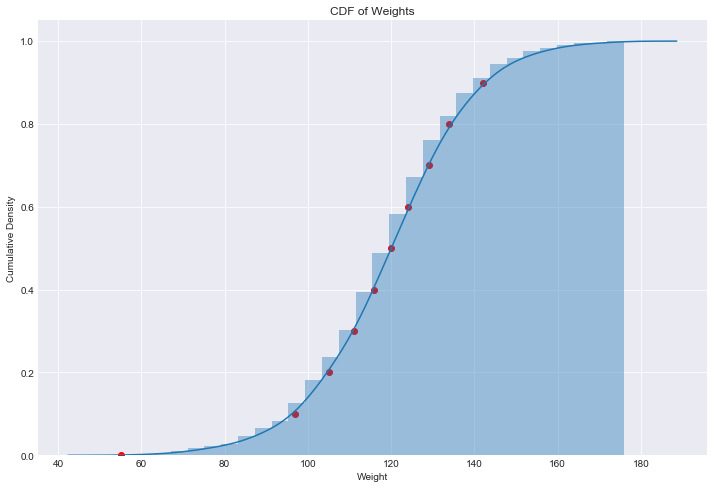

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df.weight,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True)
            )
for i in range(10):
    print('{}th percentile: {}'.format(i*10, df.weight.quantile(q=i/10.0)))
    plt.scatter(df.weight.quantile(q=i/10.0), i/10.0, c='red')
plt.title('CDF of Weights')
plt.xlabel('Weight')
plt.ylabel('Cumulative Density')

Q: Looking at the CDF, approximately what is the median of this dataset? The first quartile? The 75th percentile?

A: Median is also the 50th percentile: 120. The first quartile is the 25th percentile 108.75 (any approximation is valid given the chart alone.) The 75th percentile is also the 3rd quartile and corresponds to a weight of 131 for this dataset. 

In [9]:
#Precise calculations....
print(df.weight.quantile(q=.25))
print(df.weight.quantile(q=.5))
print(df.weight.quantile(q=.75))

108.75
120.0
131.0


## PDF - Probability Density Function

Probability density functions serve to outline the underlying theoretical distribution of continuous variables. A PDF shows the relative likelihood of a given observation. For example, in our current example, you might wonder, what is the probability that an individual has a weight of 120 pounds? When working with PDFs, the answer to this would be 0. You really only can calculate probabilities within an interval for a continuous variable. While a lot of individuals may have a weight of approximately 120 pounds, the probability of having a weight of *exactly* 120 pounds is zero. You must define an interval, however small such as 119.999 to 120.001, in order to have a positive non-zero probability.

/Users/matthew.mitchell/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


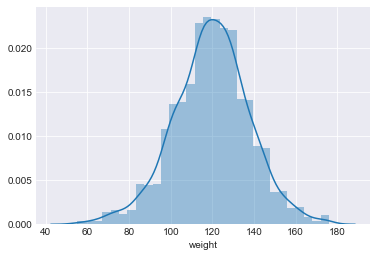

In [15]:
sns.distplot(df.weight)

While PDFs are again, the underlying distribution behind a dataset, it can be helpful to see the comparison to histograms and the frequency of observations for a specific dataset to gain a deeper understanding:

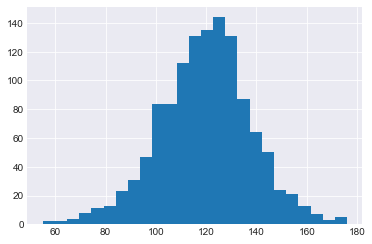

In [19]:
df.weight.hist(bins=25)

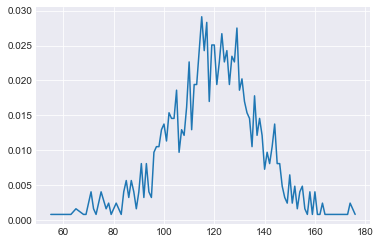

In [10]:
df.weight.value_counts(normalize=True).sort_index().plot()

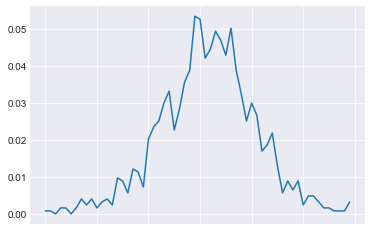

In [30]:
df.weight.value_counts(normalize=True, bins=60).sort_index().plot()

As you can see, this dataset is fairly normally distributed, where the majority of observations are clustered around the median. You can also use seaborns distplot (as before) to plot a smoothed PDF curve:

### Teacher Notes

> **! Potential Misconception**: For continuous PDF curves, the probability for any given point is 0. For example, the probability of weight 120 is zero (for the continuous case). 

## PMF -  Probability Mass Function

Probability Mass Functions, are similar to Probability Density Functions but deal with discrete data which can only take on a finite set of values.

## Summary

In this lesson, we investigated the concepts and properties behind Probability Mass Functions, Probability Density Functions and Cumulative Density Functions. Recall that a Cumulative Density Function is analagous to percentiles. Probability Mass Functions and Probability Density Functions investigate the relative likelihood of various observations for discrete and continuous cases, respectively. Remember that when dealing with a continuous variable, the probability of taking on a specific measurement is zero. Rather, we must practically investigate intervals of values.

## Adendum
## Advanced PDF Exercises (with z-scores)

In [32]:
df.weight.describe()

count    1236.000000
mean      119.576861
std        18.236452
min        55.000000
25%       108.750000
50%       120.000000
75%       131.000000
max       176.000000
Name: weight, dtype: float64

An appropriate PDF to characterize our dataset could be the normal distribution, using the mean and standard deviation given above.

According to the PDF defined by the summary statistics above, what is the probability that an individual has a weight between 115 and 125 pounds?

In [33]:
import scipy.stats as stats

In [38]:
#Teacher Notes: Partial Answer
lower_z = (115 - df.weight.mean())/df.weight.std() #z-score for 115 pounds
lower_z

-0.2509732087584941

In [39]:
stats.norm.cdf(lower_z)

0.40091741135322984

## Teacher Notes:

Ask students to interpret this calculation.
A: There is ~40% chance that an individual will have a weight below 115 pounds according to our paramters.

In [41]:
upper_z = (125 - df.weight.mean())/df.weight.std() #z-score for 115 pounds
upper_z

0.2973790734149168

In [42]:
stats.norm.cdf(upper_z)

0.6169114407886581

Similarly, there is ~61.7% chance that an individual will have a weight under 125 pounds.

In [43]:
#Putting it all together; probability of having weight between 115 and 125 pounds
stats.norm.cdf(upper_z) - stats.norm.cdf(lower_z)

0.21599402943542828

What is the observed probability of having a weight between 115 and 125 pounds according to the dataset?

In [44]:
#Answer
total_obs = len(df)
relevant_obs = len(df[(df.weight >= 115) & (df.weight <=125)])
relevant_obs / total_obs

0.2645631067961165